In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords

import re
import csv
import pandas as pd
import string
from string import digits
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from collections import Counter
from subprocess import check_output


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

In [2]:
data = pd.read_csv("D:/KULIAH!/Semeseter 7/NLP/proyek/datacleaning.csv")

In [3]:
data = data.loc[:, ['Review', 'sentimen']]

In [4]:
data.head(20)

,Review,sentimen
0,I had the Samsung A600 for awhile which is abs...,0.0
1,Due to a software issue between Nokia and Spri...,-1.0
2,"This is a great, reliable phone. I also purcha...",1.0
3,"I love the phone and all, because I really did...",0.0
4,The phone has been great for every purpose it ...,1.0
5,"Hello, I have this phone and used it until I d...",1.0
6,Cool. Cheap. Color: 3 words that describe the ...,1.0
7,"The 3599i is overall a nice phone, except that...",1.0
8,"I've never owned a Nokia phone before, so this...",1.0
9,ok well im in school and i need the text messa...,0.0


In [35]:
train_reviews = data.Review[:6000]
train_sentiment = data.sentimen[:6000]

test_reviews = data.Review[6000:]
test_sentiment = data.sentimen[6000:]

#Shape of train & test dataset
print('Shape of train dataset::',train_reviews.shape,train_sentiment.shape)
print('Shape of test dataset::',test_reviews.shape,test_sentiment.shape)

Shape of train dataset:: (6000,) (6000,)
Shape of test dataset:: (4001,) (4001,)


In [37]:
#split the dataset  
#train dataset
train_reviews = data.Review[:6000]
train_sentiments = data.sentimen[:6000]
#test dataset
test_reviews = data.Review[6000:]
test_sentiments = data.sentimen[6000:]
print(train_reviews.shape, train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(6000,) (6000,)
(4001,) (4001,)


#### 1. Case Folding

In [ ]:
pd.set_option('display.max_colwidth',-1)
for i in range(len(data)):
    lowercase = str.lower(data_train['Review'].iloc[i])
    data_train['Review'].iloc[i]=lowercase
#print 'Data train case folding...'
data_train.head(20)

In [2]:
data = pd.read_csv("D:/KULIAH!/Semeseter 7/NLP/proyek/datacleaning.csv")

#### 2. Normalization
Convert words into normalized words, convert negation, and remove punctuations.

In [6]:
# Convert words into normalized words
normalization = pd.read_csv('D:/KULIAH!/Semeseter 7/NLP/proyek/datacleaning.csv')

d = {}
for row in normalization:
    k= row
    v= row
    d[str.lower(k)] = str.lower(v)
pat = re.compile(r"\b(%s)\b" % "|".join(d))

for i in range(len(data)):
    text = str.lower(data['Review'].iloc[i])
    normal = pat.sub(lambda m: d.get(m.group()), text)
    data['Review'].iloc[i]=normal 
#print 'Data train normalization...'
data.head(20)

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Review,sentimen
0,i had the samsung a600 for awhile which is abs...,0.0
1,due to a software issue between nokia and spri...,-1.0
2,"this is a great, reliable phone. i also purcha...",1.0
3,"i love the phone and all, because i really did...",0.0
4,the phone has been great for every purpose it ...,1.0
5,"hello, i have this phone and used it until i d...",1.0
6,cool. cheap. color: 3 words that describe the ...,1.0
7,"the 3599i is overall a nice phone, except that...",1.0
8,"i've never owned a nokia phone before, so this...",1.0
9,ok well im in school and i need the text messa...,0.0


In [9]:
# Remove Punctuations
cleaned=[]
i=0
for words in data['Review']:
    for punctuation in string.punctuation:
        words = words.replace(punctuation,"")
    for number in '1234567890':
        words = words.replace(number,"")
    data['Review'][i] = words
    i = i+1
print ('Data train punctuation removing...')
data.head(20)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Data train punctuation removing...


,Review,sentimen
0,i had the samsung a for awhile which is absolu...,0.0
1,due to a software issue between nokia and spri...,-1.0
2,this is a great reliable phone i also purchase...,1.0
3,i love the phone and all because i really did ...,0.0
4,the phone has been great for every purpose it ...,1.0
5,hello i have this phone and used it until i de...,1.0
6,cool cheap color words that describe the noki...,1.0
7,the i is overall a nice phone except that noki...,1.0
8,ive never owned a nokia phone before so this i...,1.0
9,ok well im in school and i need the text messa...,0.0


In [10]:
# Convert Negation
negation = pd.read_csv('D:/KULIAH!/Semeseter 7/NLP/proyek/datacleaning.csv')
d = {}
for row in negation:
    k= row ; v= row
    d[str.lower(k)] = str.lower(v)
    #print (d[k])
pat = re.compile(r"\b(%s)\b" % "|".join(d))
for i in range(len(data)):
    convert = str.lower(data['Review'].iloc[i])
    convert = pat.sub(lambda m: d.get(m.group()), convert)
    data['Review'].iloc[i]=convert
print ('Data train negation word converting...')
data.head(20)

Data train negation word converting...


,Review,sentimen
0,i had the samsung a for awhile which is absolu...,0.0
1,due to a software issue between nokia and spri...,-1.0
2,this is a great reliable phone i also purchase...,1.0
3,i love the phone and all because i really did ...,0.0
4,the phone has been great for every purpose it ...,1.0
5,hello i have this phone and used it until i de...,1.0
6,cool cheap color words that describe the noki...,1.0
7,the i is overall a nice phone except that noki...,1.0
8,ive never owned a nokia phone before so this i...,1.0
9,ok well im in school and i need the text messa...,0.0


#### 4. Tokenizing 

In [14]:
stop_words=set(stopwords.words('english'))
tokens = []
for words in data['Review']:
    word_tokens = word_tokenize(words)
    words=[]
    for word in ( w for w in word_tokens if not w in stop_words):
        words.append(word)
    tokens.append(words)
print ('Showing results of data train tokenization...\n')
tokens

Showing results of data train tokenization...



[['samsung',
  'awhile',
  'absolute',
  'doo',
  'doo',
  'read',
  'review',
  'detect',
  'rage',
  'stupid',
  'thing',
  'finally',
  'died',
  'used',
  'nokia',
  'phone',
  'bought',
  'garage',
  'sale',
  'wonder',
  'sold',
  'cheap',
  'bad',
  'hate',
  'menu',
  'takes',
  'forever',
  'get',
  'want',
  'scroll',
  'endlessly',
  'usually',
  'phones',
  'numbered',
  'categories',
  'u',
  'simply',
  'press',
  'get',
  'want',
  'go',
  'pain',
  'put',
  'silent',
  'vibrate',
  'youre',
  'class',
  'rings',
  'turn',
  'immediately',
  'theres',
  'fast',
  'way',
  'silence',
  'damn',
  'thing',
  'always',
  'remember',
  'put',
  'silent',
  'learned',
  'hard',
  'way',
  'true',
  'case',
  'mission',
  'get',
  'break',
  'ur',
  'nails',
  'process',
  'also',
  'youll',
  'damage',
  'case',
  'time',
  'u',
  'try',
  'reason',
  'phone',
  'started',
  'giving',
  'problems',
  'succeed',
  'opening',
  'buttons',
  'could',
  'bit',
  'bigger',
  'vibra

In [ ]:
print ('Split data into 80% training set and 20% validation set...')
X_train, X_val, y_train, y_val = train_test_split(train_reviews, train_sentiment, test_size=0.2, random_state=2)
print ('\nLoad %d training set...\n' %(X_train.shape[0]))
print ('Show a review in the training set:\n', X_train.iloc[1])

print ('\nLoad %d validation set...\n' %(X_val.shape[0]))
print ('Show a review in the validation set:\n', X_val.iloc[1])

In [ ]:
print ('Showing the list of data labels...')
sentiment_list = list(y_train.value_counts().index)
sentiment_list

In [ ]:
X_train_countVect=cv.fit_transform(X_train)
print ("Number of data train, number of terms : "), X_train_countVect.shape

#### 3. Stopwords Removing

In [15]:
cachedStopWords = set(stopwords.words("english"))
for i in range (len(data)):
    meaningful = data['Review'].iloc[i]
    meaningful = " ".join([word for word in meaningful.split() if word not in cachedStopWords])
    data['Review'].iloc[i]=meaningful
print ('Data trainstop words removing...')
data.head(20)

Data trainstop words removing...


,Review,sentimen
0,samsung awhile absolute doo doo read review de...,0.0
1,due software issue nokia sprint phones text me...,-1.0
2,great reliable phone also purchased phone sams...,1.0
3,love phone really need one didnt expect price ...,0.0
4,phone great every purpose offers except day bo...,1.0
5,hello phone used decided buy flip phone proble...,1.0
6,cool cheap color words describe nokia perfectl...,1.0
7,overall nice phone except nokia made universal...,1.0
8,ive never owned nokia phone first really like ...,1.0
9,ok well im school need text messaging ive phon...,0.0


5. Stemming

In [17]:
#stemming data
cleandata = []
for words in tokens:
    word=[]
    for i in range (0, len(words)):
        ps = PorterStemmer()
        review = [ps.stem(words[i])]
        review = ' '.join(review)
        word.append(review)
    cleandata.append(word)
print ('Showing result of data train stemming...')
cleandata

i=0
for words in cleandata:
    sentences=' '.join(words)
    data['Review'][i]=sentences
    i=i+1
print ('Showing cleaned data train...')
data.head(20)

Showing result of data train stemming...


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Showing cleaned data train...


,Review,sentimen
0,samsung awhil absolut doo doo read review dete...,0.0
1,due softwar issu nokia sprint phone text messa...,-1.0
2,great reliabl phone also purchas phone samsung...,1.0
3,love phone realli need one didnt expect price ...,0.0
4,phone great everi purpos offer except day boug...,1.0
5,hello phone use decid buy flip phone problem b...,1.0
6,cool cheap color word describ nokia perfectli ...,1.0
7,overal nice phone except nokia made univers he...,1.0
8,ive never own nokia phone first realli like ph...,1.0
9,ok well im school need text messag ive phone m...,0.0


#### Split Data Into Training Set and Validation Set

In [38]:
print ('Split data into 80% training set and 20% validation set...')
X_train, X_val, y_train, y_val = train_test_split(train_reviews, train_sentiment, test_size=0.2, random_state=2)
print ('\nLoad %d training set...\n' %(X_train.shape[0]))
print ('Show a review in the training set:\n', X_train.iloc[1])

print ('\nLoad %d validation set...\n' %(X_val.shape[0]))
print ('Show a review in the validation set:\n', X_val.iloc[1])

Split data into 80% training set and 20% validation set...

Load 4800 training set...

Show a review in the training set:
 immens satisfi product absolut perfect need fast ship good servic

Load 1200 validation set...

Show a review in the validation set:
 good back cell phone origin htc phone goe came good price ship speed quick


In [44]:
print ('Showing the list of data labels...')
sentiment_list = list(y_train.value_counts().index)
sentiment_list

Showing the list of data labels...


[1.0, -1.0, 0.0]

In [45]:
X_train_countVect=cv.fit_transform(X_train)
print ("Number of data train, number of terms : "), X_train_countVect.shape

Number of data train, number of terms : 


(None, (4800, 109625))

In [46]:
X_val_countVect=cv.transform(X_val)
print ("Number of validation set, number of terms:"), X_val_countVect.shape

Number of validation set, number of terms:


(None, (1200, 109625))

In [47]:
neg=len([x for x in y_train if x == -1])
pos=len([x for x in y_train if x == 1])
net=len([x for x in y_train if x == 0])
neg, pos, net

(1230, 3099, 471)

In [48]:
neg=len([x for x in y_val if x == -1])
pos=len([x for x in y_val if x == 1])
net=len([x for x in y_val if x == 0])
neg, pos, net

(285, 802, 113)

## Feature Extraction

#### Build the corpus vocabulary

In [28]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(normalization['Review'])
word2id = tokenizer.word_index

# build vocabulary of unique words
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in normalization['Review']]

vocab_size = len(word2id)
embed_size = 100
window_size = 2 # context window size

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 16006
Vocabulary Sample: [('the', 1), ('i', 2), ('and', 3), ('phone', 4), ('a', 5), ('to', 6), ('it', 7), ('is', 8), ('this', 9), ('for', 10)]


#### CBOW

In [41]:
import numpy as np
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)
            
            
# Test this out for some samples
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['i', 'had', 'samsung', 'a600'] -> Target (Y): the
Context (X): ['had', 'the', 'a600', 'for'] -> Target (Y): samsung
Context (X): ['the', 'samsung', 'for', 'awhile'] -> Target (Y): a600
Context (X): ['samsung', 'a600', 'awhile', 'which'] -> Target (Y): for
Context (X): ['a600', 'for', 'which', 'is'] -> Target (Y): awhile
Context (X): ['for', 'awhile', 'is', 'absolute'] -> Target (Y): which
Context (X): ['awhile', 'which', 'absolute', 'doo'] -> Target (Y): is
Context (X): ['which', 'is', 'doo', 'doo'] -> Target (Y): absolute
Context (X): ['is', 'absolute', 'doo', 'you'] -> Target (Y): doo
Context (X): ['absolute', 'doo', 'you', 'can'] -> Target (Y): doo
Context (X): ['doo', 'doo', 'can', 'read'] -> Target (Y): you


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 100)            1600600   
_________________________________________________________________
lambda_1 (Lambda)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16006)             1616606   
Total params: 3,217,206
Trainable params: 3,217,206
Non-trainable params: 0
_________________________________________________________________
None


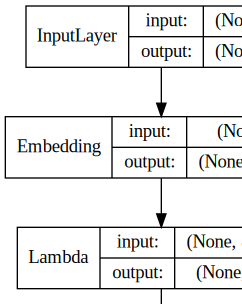

In [49]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())

# visualize model structure

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 4, 100)            1600600   
_________________________________________________________________
lambda_3 (Lambda)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16006)             1616606   
Total params: 3,217,206
Trainable params: 3,217,206
Non-trainable params: 0
_________________________________________________________________
None


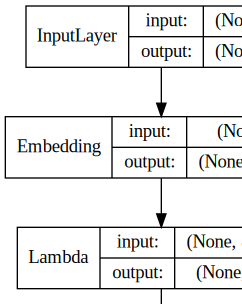

In [54]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())

# visualize model structure

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [59]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 100000 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)
    print()

KeyboardInterrupt: 

In [56]:
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

(16005, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
i,-0.431363,-0.026136,0.707100,0.409956,-0.119099,-0.431203,-0.654264,0.500641,0.538182,0.365888,...,0.118092,-0.099423,-0.300351,-0.318795,0.136126,-0.364227,0.393950,0.274052,0.169792,0.351340
and,-0.539460,0.443817,0.844197,0.321193,-0.011689,-0.643371,-0.634235,0.137472,0.476070,-0.631651,...,0.086754,0.023773,-0.285591,-0.602486,0.295494,-0.047571,0.869186,0.016329,-0.440343,0.307802
phone,-0.168887,0.282937,0.588592,0.139927,0.072196,-0.515057,-0.581692,0.163906,0.291954,-0.352472,...,0.084983,-0.172254,-0.238412,-0.518082,0.316980,-0.313369,0.694755,0.109832,-0.229498,0.330492
a,-0.236451,0.031594,0.692600,0.068163,0.369610,-0.802823,-0.336995,-0.045267,0.306967,-0.055860,...,-0.095784,-0.037499,-0.079467,-0.206562,0.014129,0.061446,0.217439,0.224052,0.079061,0.263403
to,-0.149209,0.031407,0.477353,0.400456,0.316856,-0.220692,-0.439393,0.184782,0.436493,-0.363647,...,0.252479,-0.440968,-0.349387,0.129107,0.288766,0.064602,0.425340,0.044353,0.007028,0.783507


In [57]:
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

(16005, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
i,-0.431363,-0.026136,0.707100,0.409956,-0.119099,-0.431203,-0.654264,0.500641,0.538182,0.365888,...,0.118092,-0.099423,-0.300351,-0.318795,0.136126,-0.364227,0.393950,0.274052,0.169792,0.351340
and,-0.539460,0.443817,0.844197,0.321193,-0.011689,-0.643371,-0.634235,0.137472,0.476070,-0.631651,...,0.086754,0.023773,-0.285591,-0.602486,0.295494,-0.047571,0.869186,0.016329,-0.440343,0.307802
phone,-0.168887,0.282937,0.588592,0.139927,0.072196,-0.515057,-0.581692,0.163906,0.291954,-0.352472,...,0.084983,-0.172254,-0.238412,-0.518082,0.316980,-0.313369,0.694755,0.109832,-0.229498,0.330492
a,-0.236451,0.031594,0.692600,0.068163,0.369610,-0.802823,-0.336995,-0.045267,0.306967,-0.055860,...,-0.095784,-0.037499,-0.079467,-0.206562,0.014129,0.061446,0.217439,0.224052,0.079061,0.263403
to,-0.149209,0.031407,0.477353,0.400456,0.316856,-0.220692,-0.439393,0.184782,0.436493,-0.363647,...,0.252479,-0.440968,-0.349387,0.129107,0.288766,0.064602,0.425340,0.044353,0.007028,0.783507


In [60]:
review_CBOW = pd.DataFrame(weights, index=list(id2word.values())[1:])

In [61]:
review_CBOW_test = pd.DataFrame(weights, index=list(id2word.values())[1:])

In [62]:
review_CBOW_test

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
i,-0.431363,-0.026136,0.707100,0.409956,-0.119099,-0.431203,-0.654264,0.500641,0.538182,0.365888,...,0.118092,-0.099423,-0.300351,-0.318795,0.136126,-0.364227,0.393950,0.274052,0.169792,0.351340
and,-0.539460,0.443817,0.844197,0.321193,-0.011689,-0.643371,-0.634235,0.137472,0.476070,-0.631651,...,0.086754,0.023773,-0.285591,-0.602486,0.295494,-0.047571,0.869186,0.016329,-0.440343,0.307802
phone,-0.168887,0.282937,0.588592,0.139927,0.072196,-0.515057,-0.581692,0.163906,0.291954,-0.352472,...,0.084983,-0.172254,-0.238412,-0.518082,0.316980,-0.313369,0.694755,0.109832,-0.229498,0.330492
a,-0.236451,0.031594,0.692600,0.068163,0.369610,-0.802823,-0.336995,-0.045267,0.306967,-0.055860,...,-0.095784,-0.037499,-0.079467,-0.206562,0.014129,0.061446,0.217439,0.224052,0.079061,0.263403
to,-0.149209,0.031407,0.477353,0.400456,0.316856,-0.220692,-0.439393,0.184782,0.436493,-0.363647,...,0.252479,-0.440968,-0.349387,0.129107,0.288766,0.064602,0.425340,0.044353,0.007028,0.783507
it,-0.130414,-0.038205,0.482540,0.502021,0.169221,-0.341401,-0.868177,0.022458,0.293802,-0.604391,...,0.092655,-0.050740,-0.404678,-0.613211,0.321078,-0.063767,0.339038,0.186319,-0.246304,0.350604
is,-0.203028,0.108574,0.763790,0.280541,0.247406,-0.422428,-0.378958,0.167024,0.335405,-0.465685,...,0.133500,-0.062940,-0.231290,-0.712666,0.178691,-0.278488,0.700471,0.172065,-0.114454,0.503615
this,0.289548,0.180576,0.086614,0.101772,0.302446,-0.648040,-0.395615,0.206017,0.520451,-0.058319,...,0.236944,-0.153896,-0.154619,-0.193355,0.540880,-1.062646,0.187469,0.168368,-0.210223,-0.228231
for,-0.396431,-0.014477,0.487522,0.270054,-0.015379,-0.280111,-0.643825,0.134232,0.342518,-0.378252,...,0.201329,-0.377307,-0.246027,-0.196737,-0.074279,0.512726,0.272469,0.285582,-0.225530,0.330327
of,-0.283274,0.135019,0.251581,-0.016945,0.085299,-0.471981,-0.442019,0.282722,-0.149530,-0.029105,...,0.098969,-0.072375,-0.208704,-0.084746,0.319866,-0.199534,0.518243,0.194344,-0.137934,0.214161


In [63]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

(16005, 16005)


In [64]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix_test = euclidean_distances(weights)
print(distance_matrix_test.shape)

(16005, 16005)


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
countVect = CountVectorizer(ngram_range=(1,1))
data_countVect = countVect.fit_transform(normalization['Review']) 

print ("Number of comments, number of terms : ", data_countVect.shape)

Number of comments, number of terms :  (10001, 15320)


In [70]:
from sklearn.feature_extraction.text import CountVectorizer
countVect = CountVectorizer(ngram_range=(1,1))
data_countVect = countVect.fit_transform(normalization['Review']) 

print ("Number of Review, number of terms : ", data_countVect.shape)

Number of Review, number of terms :  (10001, 15320)


In [71]:
data_countVect

<10001x15320 sparse matrix of type '<class 'numpy.int64'>'
	with 419092 stored elements in Compressed Sparse Row format>

In [73]:
print ("{} sentences and {} unique words create a matrix of the shape {}.".format(
    len(normalization['Review']),
    len(countVect.get_feature_names()),
    data_countVect.toarray().shape
))
#Create the bag of words matrix
data_countVect_BoW = data_countVect.toarray()
data_countVect_BoW

10001 sentences and 15320 unique words create a matrix of the shape (10001, 15320).


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
normalization.head(5)

,Unnamed: 0,Unnamed: 0.1,asin,rating,Review,sentimen
0,0.0,0.0,B0000SX2UC,3.0,I had the Samsung A600 for awhile which is abs...,0.0
1,1.0,1.0,B0000SX2UC,1.0,Due to a software issue between Nokia and Spri...,-1.0
2,2.0,2.0,B0000SX2UC,5.0,"This is a great, reliable phone. I also purcha...",1.0
3,3.0,3.0,B0000SX2UC,3.0,"I love the phone and all, because I really did...",0.0
4,4.0,4.0,B0000SX2UC,4.0,The phone has been great for every purpose it ...,1.0


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(normalization['Review'], normalization['sentimen'], test_size=0.2, random_state=2)

In [78]:
X_train_countVect=countVect.fit_transform(X_train)

In [79]:
X_val_countVect=countVect.transform(X_val)

In [80]:
X_val_countVect

<2001x13880 sparse matrix of type '<class 'numpy.int64'>'
	with 81112 stored elements in Compressed Sparse Row format>

In [84]:
data_countVect

<10001x15320 sparse matrix of type '<class 'numpy.int64'>'
	with 419092 stored elements in Compressed Sparse Row format>

In [85]:
X_test_countVect=countVect.fit_transform(normalization)

In [86]:
X_test_countVect

<6x5 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

#### MODEL CONSTRUCTION

In [87]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',C=1).fit(X_train_countVect, y_train)
svc_predictions = svc.predict(X_train_countVect)
svc

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [88]:
svc = SVC(kernel='linear',C=1).fit(X_train_countVect, y_train)
svc_predictions1 = svc.predict(X_val_countVect)

In [89]:
svc.predict(X_val_countVect)

array([ 1., -1.,  1., ...,  1., -1.,  1.])

In [90]:
X_val_countVect1=countVect.transform(X_val)

In [91]:
X_val

7696    Got the phone for my father, it works like it ...
7429    Bought this "new" to replace my disabled broth...
1919                                          Works great
4433    Sold this product because I did not need it. T...
8074    So, I got this phone using "Verizon Edge" prog...
4897    The product and the reviews looked great. I'm ...
7271                                            Very good
1451    I needed it for ease of use for an elderly par...
1742                       The phone discharged real fast
2614    I really wanted a flip, I now can answer with ...
9347                                             Congrats
3635    I gave it a three stars because sometimes the ...
7196    Okay.... I ordered this awesome phone the 13th...
7435    WORK HORSE, RUGGED AND WELL MADE - WE USE IT A...
8481    This phone is FANTASTIC. I can now chuck my Pa...
5620    Imagine this: you finally meet your dream girl...
6435    Bought this phone for my wife as a gift for Ch...
5460    Lasted

In [92]:
review_CBOW = pd.DataFrame(weights, index=list(id2word.values())[1:])

In [93]:
X_val

7696    Got the phone for my father, it works like it ...
7429    Bought this "new" to replace my disabled broth...
1919                                          Works great
4433    Sold this product because I did not need it. T...
8074    So, I got this phone using "Verizon Edge" prog...
4897    The product and the reviews looked great. I'm ...
7271                                            Very good
1451    I needed it for ease of use for an elderly par...
1742                       The phone discharged real fast
2614    I really wanted a flip, I now can answer with ...
9347                                             Congrats
3635    I gave it a three stars because sometimes the ...
7196    Okay.... I ordered this awesome phone the 13th...
7435    WORK HORSE, RUGGED AND WELL MADE - WE USE IT A...
8481    This phone is FANTASTIC. I can now chuck my Pa...
5620    Imagine this: you finally meet your dream girl...
6435    Bought this phone for my wife as a gift for Ch...
5460    Lasted